# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import backend
from kernels import LinearKernel, GaussianKernel, GramCSVKernel, FeatureCSVKernel, MultipleKernel

Academic license - for non-commercial use only


Kernel computed on the fly on imported data

In [4]:
kernels1a = LinearKernel().load("mat100", indices=[0, 1, 2])
kernels1b = GaussianKernel(0.1).load("mat100", indices=[0, 1, 2])

Linear kernel computed on the fly on imported features

In [5]:
kernels2a = FeatureCSVKernel("SpectralKernel6", {}).load("spectr6", indices=[0, 1, 2])
kernels2b = FeatureCSVKernel("SpectralKernel3", {}).load("spectr3", indices=[0, 1, 2])
kernels2c = FeatureCSVKernel("TranslatedKernel", {}).load("trans6", indices=[0, 1, 2])

Precomputed kernel defined from stored Gram matrices

In [6]:
kernels3 = GramCSVKernel("SubstringKernel", {}).load("substring4_0.7", indices=[0])

Parameter tuning

In [7]:
lambdas = np.logspace(-3, 2, 50)

Tuning lambda on dataset 0 with kernel LinearKernel and params {'suffix': 'mat100'}: 100%|██████████| 50/50 [01:22<00:00,  1.45s/it]


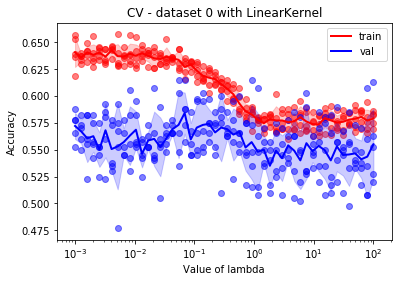

Tuning lambda on dataset 0 with kernel SpectralKernel6 and params {'suffix': 'spectr6'}: 100%|██████████| 50/50 [01:20<00:00,  1.53s/it]


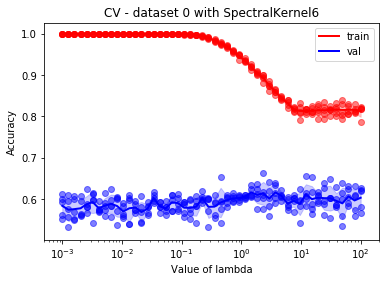

Tuning lambda on dataset 0 with kernel SpectralKernel3 and params {'suffix': 'spectr3'}: 100%|██████████| 50/50 [01:21<00:00,  1.46s/it]


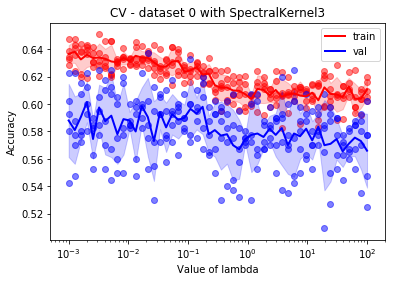

Tuning lambda on dataset 0 with kernel TranslatedKernel and params {'suffix': 'trans6'}: 100%|██████████| 50/50 [01:23<00:00,  1.52s/it]


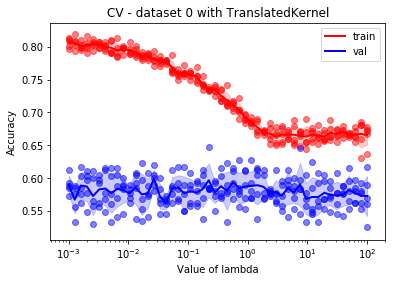

Tuning lambda on dataset 0 with kernel SubstringKernel and params {'suffix': 'substring4_0.7'}: 100%|██████████| 50/50 [01:28<00:00,  1.57s/it]


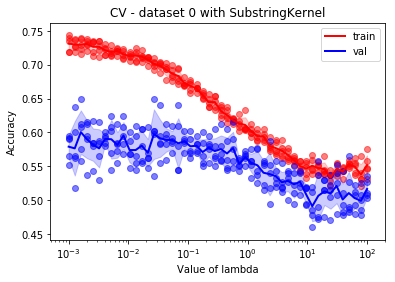

Tuning lambda on dataset 1 with kernel LinearKernel and params {'suffix': 'mat100'}: 100%|██████████| 50/50 [01:21<00:00,  1.51s/it]


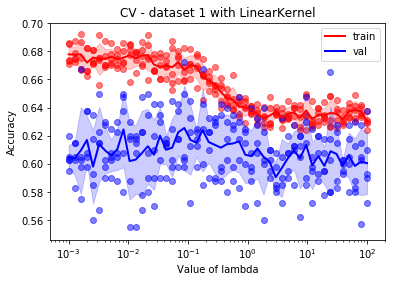

Tuning lambda on dataset 1 with kernel SpectralKernel6 and params {'suffix': 'spectr6'}: 100%|██████████| 50/50 [01:19<00:00,  1.52s/it]


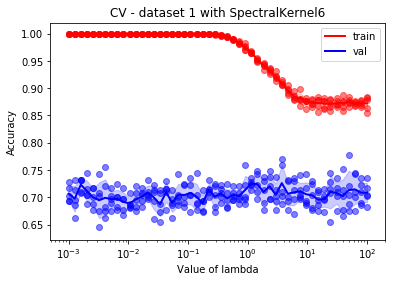

Tuning lambda on dataset 1 with kernel SpectralKernel3 and params {'suffix': 'spectr3'}: 100%|██████████| 50/50 [01:36<00:00,  1.63s/it]


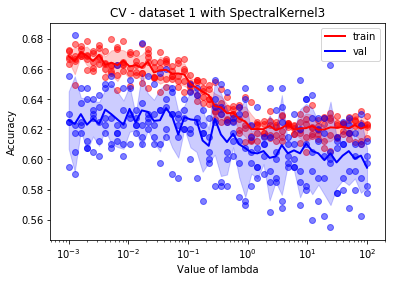

Tuning lambda on dataset 1 with kernel TranslatedKernel and params {'suffix': 'trans6'}: 100%|██████████| 50/50 [01:35<00:00,  1.60s/it]


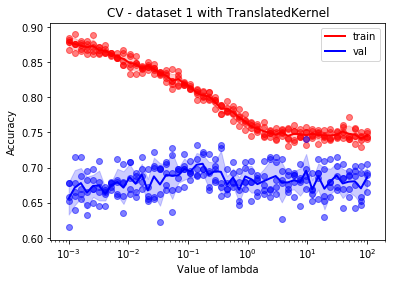

Tuning lambda on dataset 2 with kernel LinearKernel and params {'suffix': 'mat100'}: 100%|██████████| 50/50 [01:24<00:00,  1.47s/it]


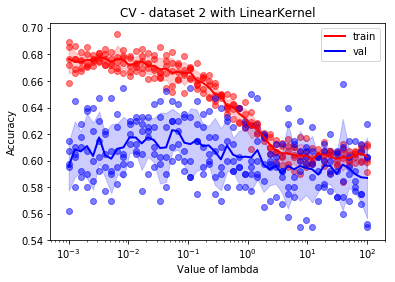

Tuning lambda on dataset 2 with kernel SpectralKernel6 and params {'suffix': 'spectr6'}: 100%|██████████| 50/50 [01:21<00:00,  1.53s/it]


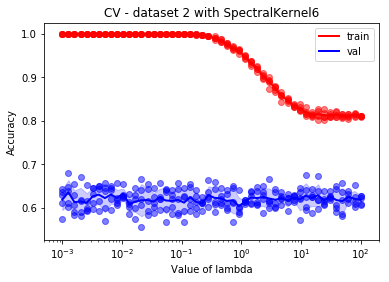

Tuning lambda on dataset 2 with kernel SpectralKernel3 and params {'suffix': 'spectr3'}: 100%|██████████| 50/50 [01:22<00:00,  1.47s/it]


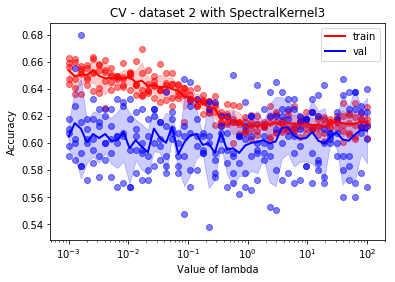

Tuning lambda on dataset 2 with kernel TranslatedKernel and params {'suffix': 'trans6'}: 100%|██████████| 50/50 [01:25<00:00,  1.54s/it]


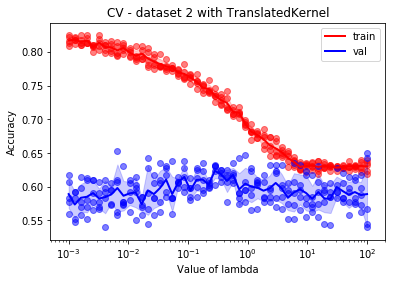

In [8]:
three_kernels = []
three_lambdas = []

use_multiple_kernel = False

for d in [0, 1, 2]:
    
    kernels_to_combine_or_compare = [
        kernels1a[d],
        # kernels1b[d],
        kernels2a[d],
        kernels2b[d],
        kernels2c[d]
    ]
    if d == 0:
        kernels_to_combine_or_compare.append(kernels3[0])

    if use_multiple_kernel:
        
        best_kernel = MultipleKernel(
            kernels_to_combine_or_compare,
            grad_step=5e-1, iterations=10)
        best_lambd = backend.tune_parameters(
            [best_kernel], lambdas,
            plot=True, result="best_lambdas")[0]
        
    else:
        best_kernel, best_lambd = backend.tune_parameters(
            kernels_to_combine_or_compare, lambdas,
            plot=True, result="best_kernel_lambda")
        
    three_kernels.append(best_kernel)
    three_lambdas.append(best_lambd)

In [9]:
backend.final_prediction(three_kernels, three_lambdas)

DATASET 0
DATASET 1
DATASET 2
